In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hosp = pd.read_csv("hosp.csv", dtype={'Quantidade': int})
hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607020 entries, 0 to 1607019
Data columns (total 20 columns):
COD_MUNICIPIO        1607020 non-null int64
NO_MUNICIPIO         1607020 non-null object
COD_MUNICIPIO_RES    1607020 non-null int64
NO_MUNICIPIO_RES     1607020 non-null object
CNES                 1607020 non-null int64
ESTABELECIMENTO      1607020 non-null object
COD_PROCEDIMENTO     1607020 non-null int64
NO_PROCEDIMENTO      1607020 non-null object
SEXO                 1607020 non-null object
COD_RACA             1607020 non-null int64
RACACOR              1607020 non-null object
IDADE                1607020 non-null int64
Quantidade           1607020 non-null int64
Valor                1607020 non-null float64
ANO_MES              1607020 non-null object
ano                  1607020 non-null int64
mes                  1607020 non-null int64
latitude             1607020 non-null float64
longitude            1607020 non-null float64
name                 1607020 non-null 

In [3]:
mais_oc = hosp.sort_values('Quantidade', ascending=False)[:10]
mo = mais_oc[['NO_PROCEDIMENTO','Quantidade', 'ano', 'mes', 'NO_MUNICIPIO']]
mo

,NO_PROCEDIMENTO,Quantidade,ano,mes,NO_MUNICIPIO
223629,ATENDIMENTO FAMILIAR EM CENTRO DE ATENÇÃO PSIC...,2018,2017,6,CAMPINA GRANDE
18390,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,1608,2017,8,ALHANDRA
18302,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,1394,2017,12,ALHANDRA
16146,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,1388,2017,7,ALHANDRA
238550,TERAPIA INDIVIDUAL,1135,2018,11,CATOLE DO ROCHA
1053455,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,1111,2017,10,JOAO PESSOA
960781,ADMINISTRACAO DE MEDICAMENTOS NA ATENCAO ESPEC...,1109,2019,1,JOAO PESSOA
76050,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,980,2018,3,BAYEUX
16357,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,929,2017,11,ALHANDRA
903953,ADMINISTRACAO DE MEDICAMENTOS NA ATENCAO ESPEC...,855,2019,5,JOAO PESSOA


Text(0.5, 0.97, 'Procedimentos que mais ocorreram entre 2017 e 2019 na Paraíba')

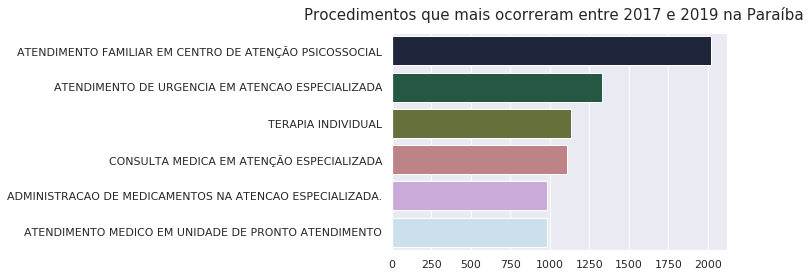

In [4]:
mais_oc = hosp.sort_values('Quantidade', ascending=False)[:10]
sns.set()
sns.set_palette("cubehelix")
ax = sns.barplot(y="NO_PROCEDIMENTO", x="Quantidade", data=mais_oc, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('')
figure.suptitle('Procedimentos que mais ocorreram entre 2017 e 2019 na Paraíba', y=0.97, fontsize=15)

In [5]:
hosp.ano.value_counts()

2018    591276
2019    508983
2017    506761
Name: ano, dtype: int64

Text(0.5, 0.97, 'Quantidade de pacientes por idade da maioria entre 2017 e 2019 na Paraíba ')

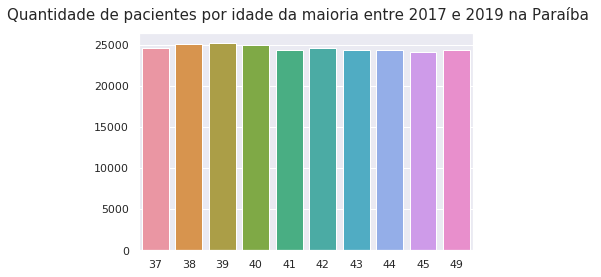

In [7]:
idade_maioria = hosp.loc[(hosp['IDADE'] >= 37) & (hosp['IDADE'] <=49)]
idades = idade_maioria.IDADE.value_counts()[:10]
i = idades.to_frame().reset_index().rename(columns = {'index': 'idade', 'IDADE': 'qtd_idades'})
sns.set()
sns.set_palette("cubehelix")
ax = sns.barplot(x="idade", y="qtd_idades", data=i, ci=None)
figure = ax.get_figure() 
sns.set_context("talk")
ax.set_ylabel('')    
ax.set_xlabel('')
#se tu puder, troca esse título
figure.suptitle('Quantidade de pacientes por idade da maioria entre 2017 e 2019 na Paraíba ', y=0.97, fontsize=15)

Text(0.5, 0.97, 'Procedimentos que a maioria das pessoas fez entre 2017 e 2019 na Paraíba')

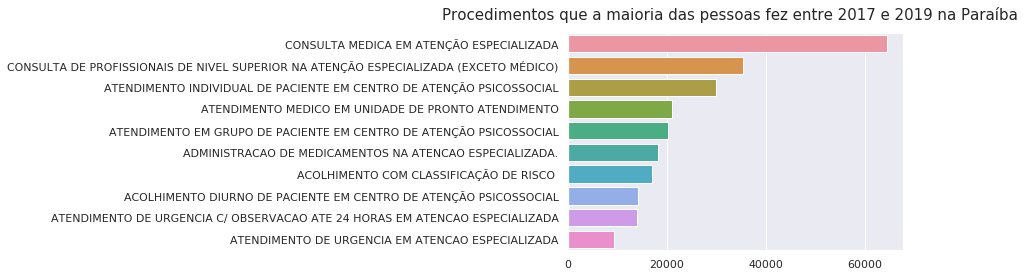

In [8]:
proc_idade = idade_maioria.NO_PROCEDIMENTO.value_counts()[:10]
pi = proc_idade.to_frame().reset_index().rename(columns = {'index': 'procedimento', 'NO_PROCEDIMENTO': 'qtd_procedimentos'})
sns.set()
sns.set_palette("cubehelix")
ax = sns.barplot(y="procedimento", x="qtd_procedimentos", data=pi, ci=None)
figure = ax.get_figure() 
sns.set_context("talk")
ax.set_ylabel('')    
ax.set_xlabel('')
#se tu puder, troca esse título
figure.suptitle('Procedimentos que a maioria das pessoas fez entre 2017 e 2019 na Paraíba', y=0.97, fontsize=15)